# Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings(action = 'ignore')

# Read the Dataset

In [2]:
#data = pd.read_csv('/kaggle/input/mens-t20-cwc-dataset-2007-2004/wc_final_dataset.csv', encoding = 'unicode_escape')

In [3]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\wc_final_dataset.csv")

# Sanity Check of Data

In [4]:
# shape
data.shape

(317, 16)

In [5]:
# to get first five rows
data.head()

Team1     Team2    Winner     Margin        Ground  Match Date  \
0         India  Pakistan     India     5 runs  Johannesburg  2007/09/24   
1     Australia     India     India    15 runs        Durban  2007/09/22   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town  2007/09/22   
3  South Africa     India     India    37 runs        Durban  2007/09/20   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town  2007/09/20   

  T-20 Int Match  Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0      T20I # 46                      67.13                      65.87   
1      T20I # 45                      66.54                      70.20   
2      T20I # 44                      66.07                      67.20   
3      T20I # 43                      69.53                      75.67   
4      T20I # 42                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.77                      82.40   
2                      68.60                      66.60   
3                      76.93                      86.33   
4                      70.60                      68.33   

   Team1 Total WCs participated  Team1 Total WCs won  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   

   Team2 Total WCs participated  Team2 Total WCs won  Team1 win % over Team2  
0                             0                    0                   100.0  
1                             0                    0                     0.0  
2                             0                    0                     0.0  
3                             0                    0                     0.0  
4                             0                    0                     0.0

In [6]:
data.tail()

Team1      Team2        Winner     Margin      Ground  Match Date  \
312   Afghanistan     Uganda   Afghanistan   125 runs  Providence  2024/06/03   
313  South Africa  Sri Lanka  South Africa  6 wickets    New York  2024/06/03   
314       Namibia       Oman          tied          -  Bridgetown  2024/06/02   
315   West Indies        PNG   West Indies  5 wickets  Providence  2024/06/02   
316           USA     Canada           USA  7 wickets      Dallas  2024/06/01   

    T-20 Int Match  Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
312    T20I # 2636                      85.40                     101.00   
313    T20I # 2635                      77.73                      84.60   
314    T20I # 2634                     100.25                     101.00   
315    T20I # 2633                      78.33                      98.80   
316    T20I # 2632                     101.00                     100.47   

     Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
312                      86.67                      101.0   
313                      79.87                       93.2   
314                      99.75                      101.0   
315                      85.13                      101.0   
316                     101.00                      101.0   

     Team1 Total WCs participated  Team1 Total WCs won  \
312                             6                    0   
313                             8                    0   
314                             2                    0   
315                             8                    2   
316                             0                    0   

     Team2 Total WCs participated  Team2 Total WCs won  Team1 win % over Team2  
312                             0                    0                    0.00  
313                             8                    1                   64.70  
314                             2                    0                   66.60  
315                             1                    0                    0.00  
316                             0                    0                   57.14

In [7]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team1                         317 non-null    object 
 1   Team2                         317 non-null    object 
 2   Winner                        317 non-null    object 
 3   Margin                        317 non-null    object 
 4   Ground                        317 non-null    object 
 5   Match Date                    317 non-null    object 
 6   T-20 Int Match                317 non-null    object 
 7   Team1 Avg Batting Ranking     317 non-null    float64
 8   Team2 Avg Batting Ranking     317 non-null    float64
 9   Team1 Avg Bowling Ranking     317 non-null    float64
 10  Team2 Avg Bowling Ranking     317 non-null    float64
 11  Team1 Total WCs participated  317 non-null    int64  
 12  Team1 Total WCs won           317 non-null    int64  
 13  Team2

In [8]:
# Convert 'Match Date' to datetime
data['Match Date'] = pd.to_datetime(data['Match Date'])

In [9]:
# checking for dupplicates
data.duplicated().sum()

0

In [10]:
# columns
data.columns

Index(['Team1', 'Team2', 'Winner', 'Margin', 'Ground', 'Match Date',
       'T-20 Int Match', 'Team1 Avg Batting Ranking',
       'Team2 Avg Batting Ranking', 'Team1 Avg Bowling Ranking',
       'Team2 Avg Bowling Ranking', 'Team1 Total WCs participated',
       'Team1 Total WCs won', 'Team2 Total WCs participated',
       'Team2 Total WCs won', 'Team1 win % over Team2'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [11]:
# descriptive statistics
data.describe(include = 'number').T

count       mean        std    min    25%  \
Team1 Avg Batting Ranking     317.0  81.831420   9.521749  64.07  74.73   
Team2 Avg Batting Ranking     317.0  81.921830  10.248014  64.93  73.33   
Team1 Avg Bowling Ranking     317.0  81.824669   9.410076  58.77  75.00   
Team2 Avg Bowling Ranking     317.0  82.948707  10.217811  63.40  74.40   
Team1 Total WCs participated  317.0   3.694006   2.612845   0.00   1.00   
Team1 Total WCs won           317.0   0.299685   0.546942   0.00   0.00   
Team2 Total WCs participated  317.0   3.526814   2.584657   0.00   1.00   
Team2 Total WCs won           317.0   0.331230   0.528375   0.00   0.00   
Team1 win % over Team2        317.0  31.862776  34.688898   0.00   0.00   

                                50%    75%    max  
Team1 Avg Batting Ranking     80.47  89.00  101.0  
Team2 Avg Batting Ranking     80.31  90.67  101.0  
Team1 Avg Bowling Ranking     81.27  86.93  101.0  
Team2 Avg Bowling Ranking     81.60  91.73  101.0  
Team1 Total WCs participated   4.00   6.00    8.0  
Team1 Total WCs won            0.00   1.00    2.0  
Team2 Total WCs participated   3.00   6.00    8.0  
Team2 Total WCs won            0.00   1.00    2.0  
Team1 win % over Team2        25.00  57.14  100.0

# To visualize the Pairplot

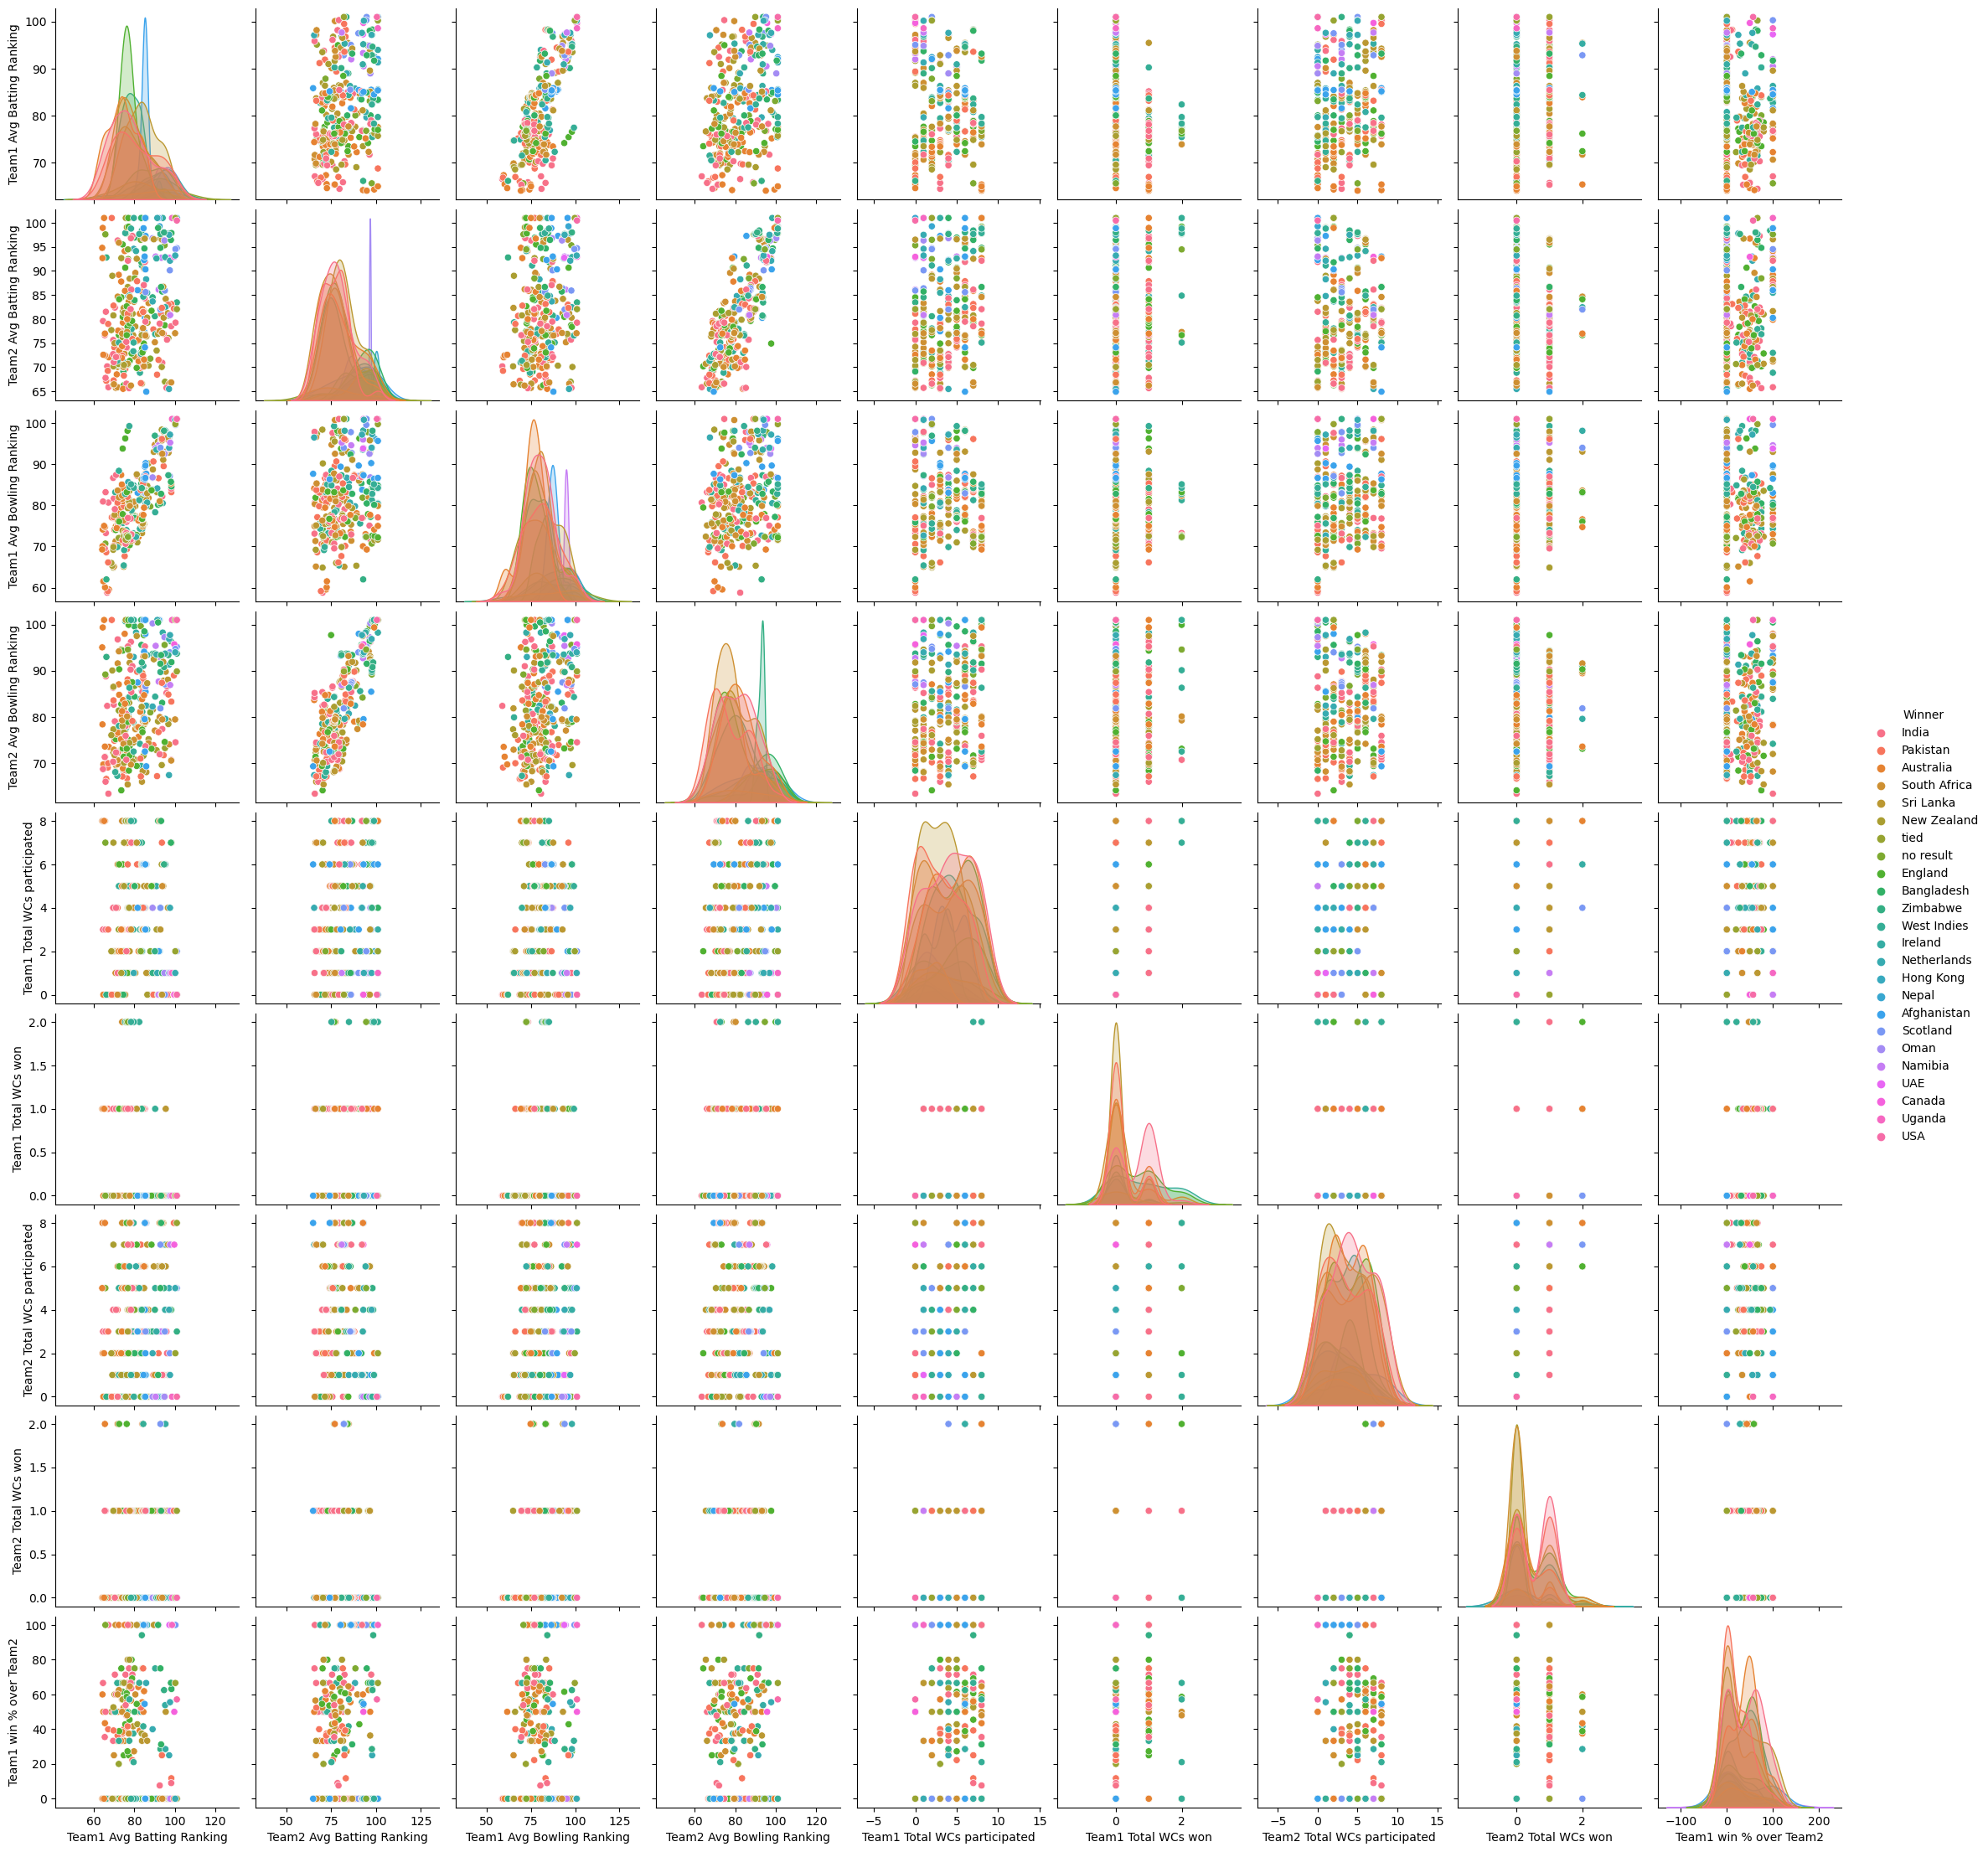

In [12]:
sns.pairplot(data, hue = 'Winner')
plt.show()

# Histogram to understand the Distribution

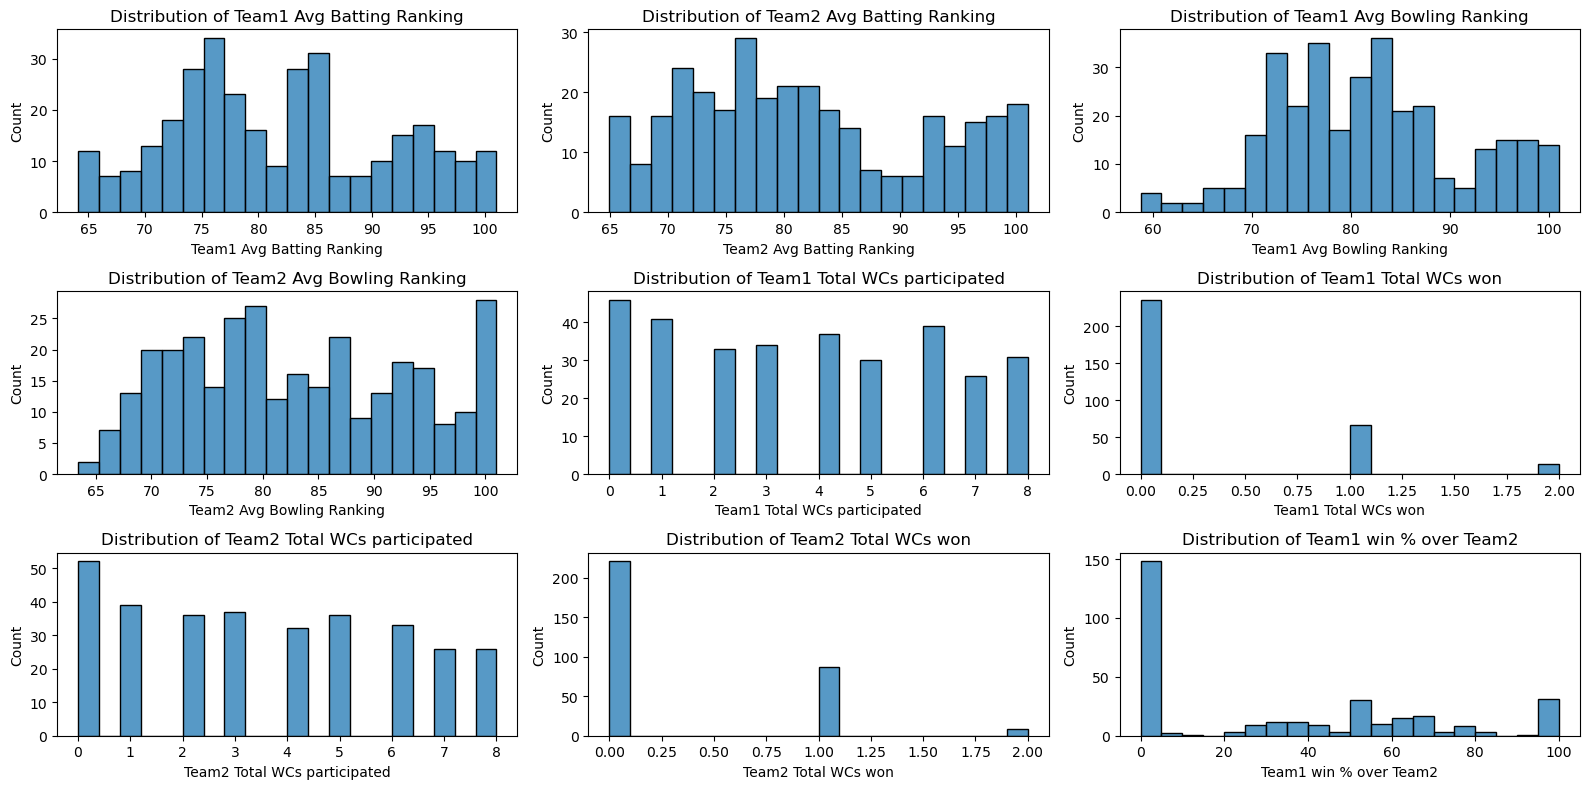

In [13]:

num_cols = data.select_dtypes(include='number').columns


n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows


fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing


for i, col in enumerate(num_cols):
    sns.histplot(data[col], bins=20, ax=axes[i], kde=False)  # Histogram without KDE
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# What is the relationship between batting rankings and bowling rankings for Team1 and Team2?

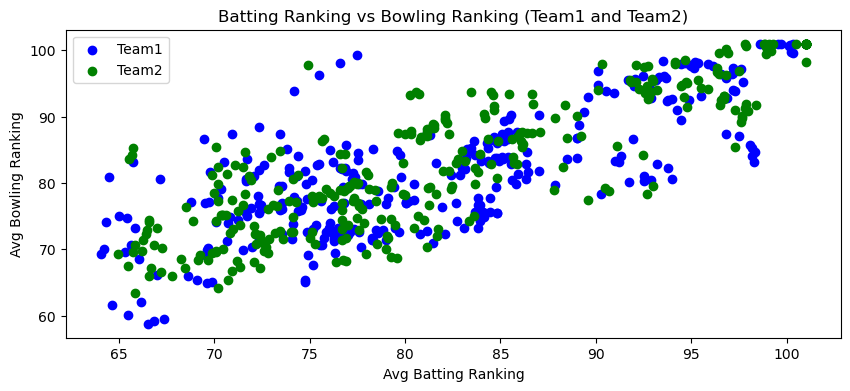

In [14]:

plt.figure(figsize=(10, 4))
plt.scatter(data['Team1 Avg Batting Ranking'], data['Team1 Avg Bowling Ranking'], color='blue', label='Team1')
plt.scatter(data['Team2 Avg Batting Ranking'], data['Team2 Avg Bowling Ranking'], color='green', label='Team2')
plt.title('Batting Ranking vs Bowling Ranking (Team1 and Team2)')
plt.xlabel('Avg Batting Ranking')
plt.ylabel('Avg Bowling Ranking')
plt.legend()
plt.show()


# What are the most common margins of victories?

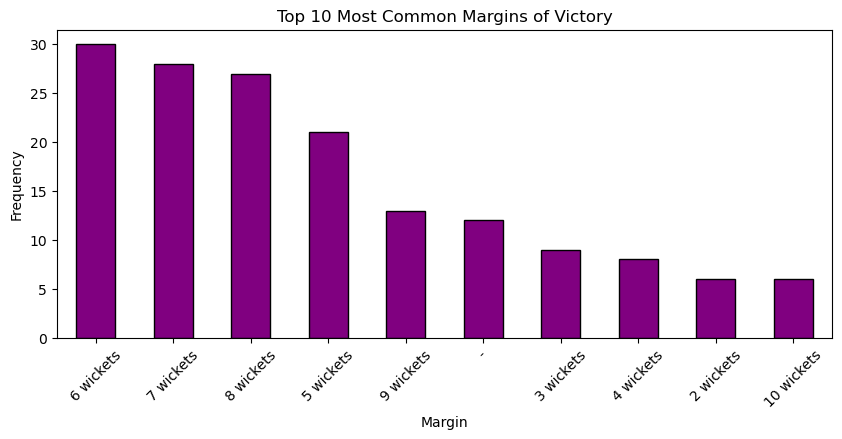

In [15]:

margin_counts = data['Margin'].value_counts()


plt.figure(figsize=(10, 4))
margin_counts.head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Common Margins of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Count of Matches Won by Each Team


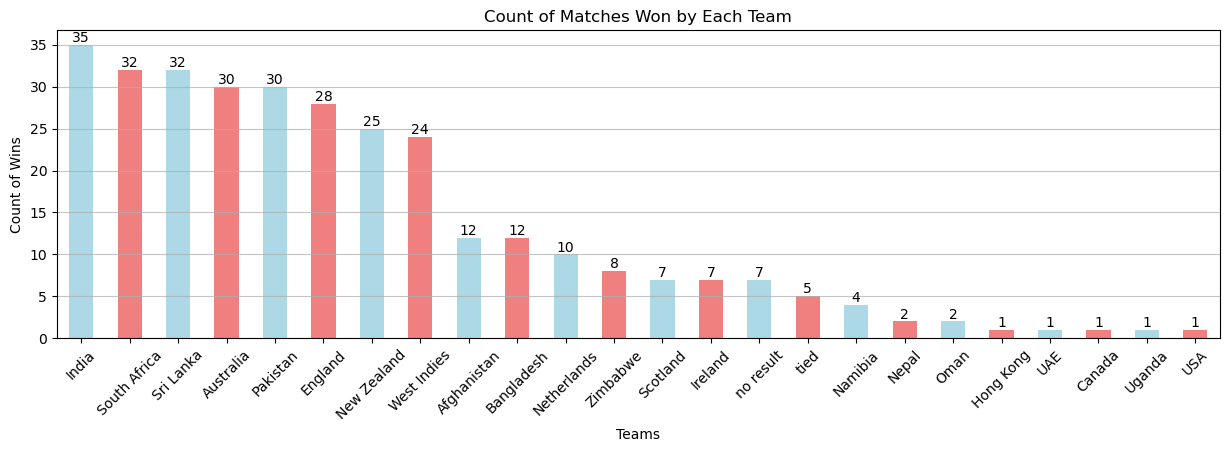

In [16]:
team_wins = data['Winner'].value_counts()


plt.figure(figsize=(15, 4))
ax=team_wins.plot(kind='bar', color=['lightblue', 'lightcoral'])
ax.bar_label(ax.containers[0])
plt.title('Count of Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Count of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


# Top 5 Grounds Where Most Matches Were Played

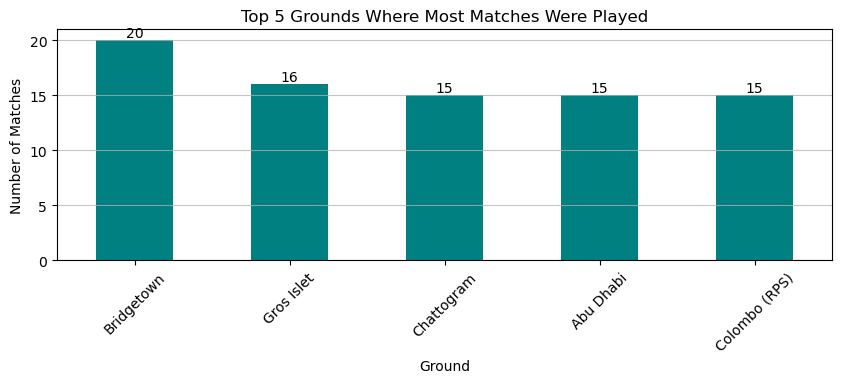

In [18]:

ground_counts = data['Ground'].value_counts().head(5)


plt.figure(figsize=(10, 3))
ax=ground_counts.plot(kind='bar', color='teal')
plt.title('Top 5 Grounds Where Most Matches Were Played')
ax.bar_label(ax.containers[0])
plt.xlabel('Ground')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


# Distribution of Match Margins

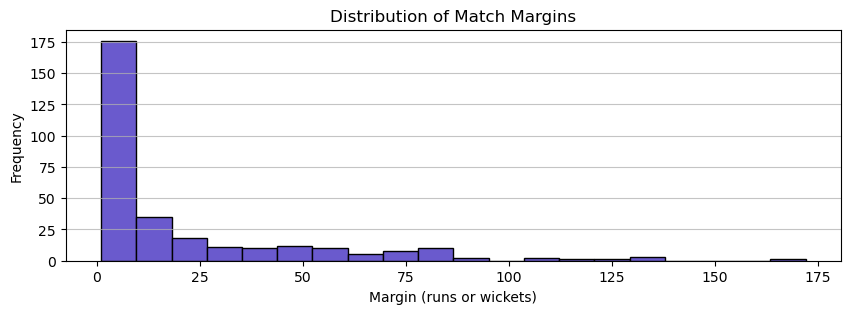

In [19]:
# Extract numeric values from 'Margin' column
data['Margin_Value'] = pd.to_numeric(data['Margin'].str.extract('(\d+)')[0])

# Plot the distribution of match margins
plt.figure(figsize=(10, 3))
plt.hist(data['Margin_Value'].dropna(), bins=20, color='slateblue', edgecolor='black')
plt.title('Distribution of Match Margins')
plt.xlabel('Margin (runs or wickets)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


# How do the average batting and bowling rankings correlate with the win percentage of Team1 over Team2?

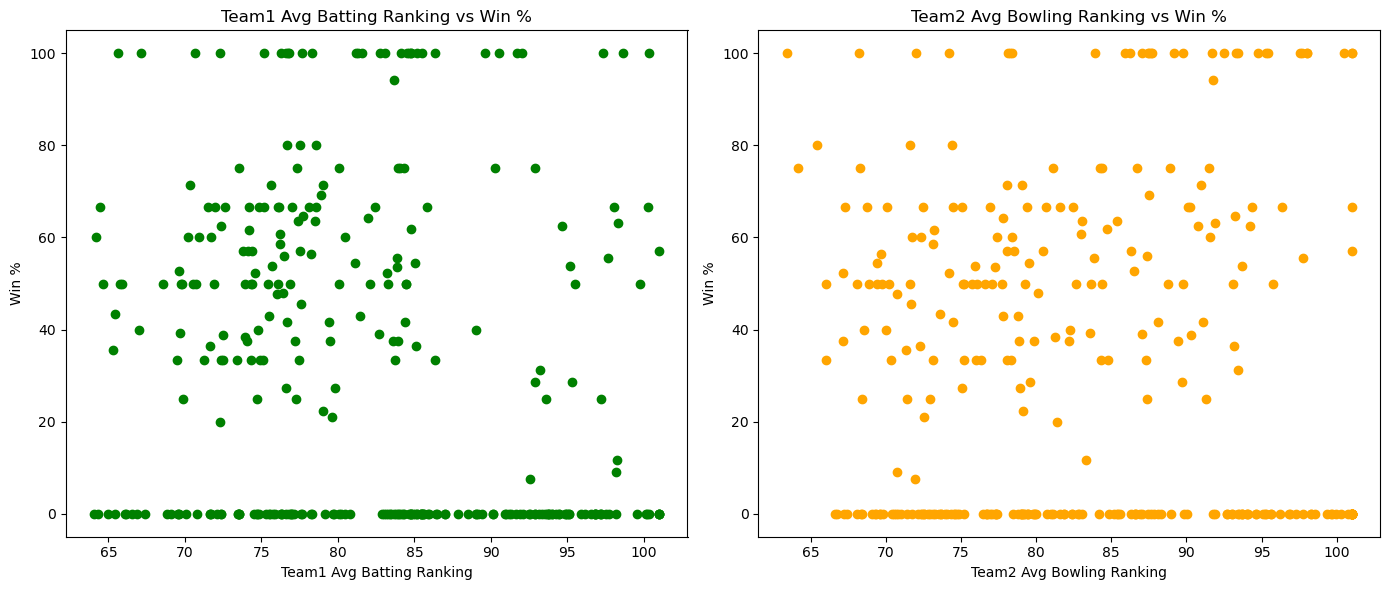

In [20]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Correlation between Team1 Average Batting Ranking and Win %
axes[0].scatter(data['Team1 Avg Batting Ranking'], data['Team1 win % over Team2'], color='green')
axes[0].set_title('Team1 Avg Batting Ranking vs Win %')
axes[0].set_xlabel('Team1 Avg Batting Ranking')
axes[0].set_ylabel('Win %')

# Correlation between Team2 Average Bowling Ranking and Win %
axes[1].scatter(data['Team2 Avg Bowling Ranking'], data['Team1 win % over Team2'], color='orange')
axes[1].set_title('Team2 Avg Bowling Ranking vs Win %')
axes[1].set_xlabel('Team2 Avg Bowling Ranking')
axes[1].set_ylabel('Win %')

plt.tight_layout()
plt.show()


# How many times has each team participated in the World Cup?


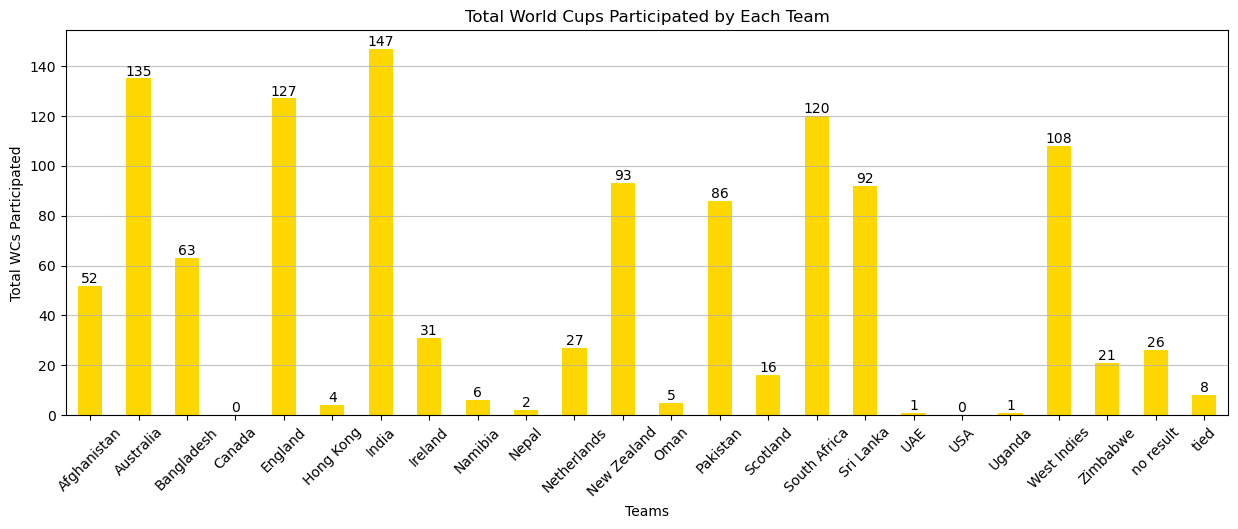

In [21]:

team_participation = data.groupby('Winner')['Team1 Total WCs participated'].sum()
plt.figure(figsize=(15, 5))
ax=team_participation.plot(kind='bar', color='gold')
ax.bar_label(ax.containers[0])
plt.title('Total World Cups Participated by Each Team')
plt.xlabel('Teams')
plt.ylabel('Total WCs Participated')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


# Boxplot to identify Outliers

In [22]:
for i in data.select_dtypes(include = 'number').columns:
    fig = px.box(data, x = i)
    fig.update_layout(
    height = 400,
    width = 700,
    title = f' {i}'
    )
    fig.show()

# Visualize the Distribution of Wins by Teams

In [37]:
win_count = data['Winner'].value_counts().reset_index()
win_count.columns = ['Team', 'Wins']  
fig = px.pie(win_count, 
             names='Team', 
             values='Wins', 
             title='Win Distribution by Teams')
fig.show()

# Average Batting Rankings

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(x = data['Team1'], 
                     y = data['Team1 Avg Batting Ranking'], 
                     name = 'Team1 Avg Batting Ranking', 
                     marker_color = 'indianred'))
fig.add_trace(go.Bar(x = data['Team2'], 
                     y = data['Team2 Avg Batting Ranking'], 
                     name = 'Team2 Avg Batting Ranking', 
                     marker_color = 'lightsalmon'))
fig.update_layout(
    title = 'Team1 vs Team2 Average Batting Rankings', 
    xaxis_title = 'Teams', 
    yaxis_title = 'Avg Batting Ranking', 
    barmode = 'group')
fig.show()

# Average Bowling Rankings

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(x = data['Team1'], 
                     y = data['Team1 Avg Bowling Ranking'], 
                     name = 'Team1 Avg Bowling Ranking', 
                     marker_color = 'darkblue'))
fig.add_trace(go.Bar(x = data['Team2'], 
                     y = data['Team2 Avg Bowling Ranking'], 
                     name = 'Team2 Avg Bowling Ranking', 
                     marker_color = 'lightblue'))

fig.update_layout(title = 'Team1 vs Team2 Average Bowling Rankings', 
                  xaxis_title = 'Teams', 
                  yaxis_title = 'Avg Bowling Ranking', 
                  barmode = 'group')
fig.show()

# Win Percentage Over Time

In [26]:
fig = px.line(data, 
              x = 'Match Date', 
              y = 'Team1 win % over Team2', 
              title = 'Team1 Win Percentage Over Team2 Over Time')
fig.show()

# Relationship between Team1 Win percentage and Team1 Average Batting Ranking

In [27]:
fig = px.scatter(data, 
                 x = 'Team1 Avg Batting Ranking', 
                 y = 'Team1 win % over Team2', 
                 title = 'Team1 Win Percentage vs Team1 Batting Ranking')
fig.show()

# Wins by Teams and Grounds

In [28]:
fig = px.sunburst(data, 
                  path=['Winner', 'Ground'], 
                  title="Wins by Teams and Grounds")
fig.update_layout(width=1000,  height=800   )
fig.show()

# Visualize the Margin of Victory by Teams

In [29]:
fig = px.box(data, x = 'Winner', 
             y = 'Margin', 
             title = 'Margin of Victory by Teams')
fig.show()

# Analyze Team1 Bowling Ranking vs Win Percentage

In [30]:
fig = px.scatter(data, x = 'Team1 Avg Bowling Ranking', 
                 y = 'Team1 win % over Team2',
                 title = 'Team1 Bowling Ranking vs Win Percentage', 
                 trendline = 'ols', 
                 labels = {'Team1 Avg Bowling Ranking': 'Team1 Avg Bowling Ranking', 'Team1 win % over Team2': 'Team1 Win %'})
fig.show()

# Analyze Team2 Batting Ranking vs Win Percentage

In [31]:
fig = px.scatter(data, x = 'Team2 Avg Batting Ranking', 
                 y = 'Team1 win % over Team2',
                 title = 'Team2 Batting Ranking vs Team1 Win Percentage', 
                 trendline = 'ols', 
                 labels = {'Team2 Avg Batting Ranking': 'Team2 Avg Batting Ranking', 'Team1 win % over Team2': 'Team1 Win %'})
fig.show()

# Effect of both Team1 & Team2 Rankings on Team1 win percentage

In [32]:
fig = px.scatter_3d(data, x = 'Team1 Avg Batting Ranking', 
                    y = 'Team1 Avg Bowling Ranking', 
                    z = 'Team1 win % over Team2',
                    color = 'Team2 Avg Batting Ranking', 
                    size = 'Team2 Avg Bowling Ranking',
                    title = 'Team1 Batting & Bowling Rankings vs Win Percentage',
                    labels = {'Team1 Avg Batting Ranking': 'Team1 Avg Batting Ranking', 
                            'Team1 Avg Bowling Ranking': 'Team1 Avg Bowling Ranking', 
                            'Team1 win % over Team2': 'Team1 Win %'})
fig.show()

# Winner and Ground to find out on which grounds the teams perform best

In [33]:
ground_performance = data.groupby(['Winner', 'Ground']).size().reset_index(name='Wins')

fig = px.bar(ground_performance, 
             x = 'Ground', 
             y = 'Wins', 
             color = 'Winner', 
             title = 'Team Wins by Ground',
             labels = {'Ground': 'Ground', 'Wins': 'Number of Wins', 'Winner': 'Teams'}, 
             barmode = 'group')
fig.show()

# Correlation Heatmap

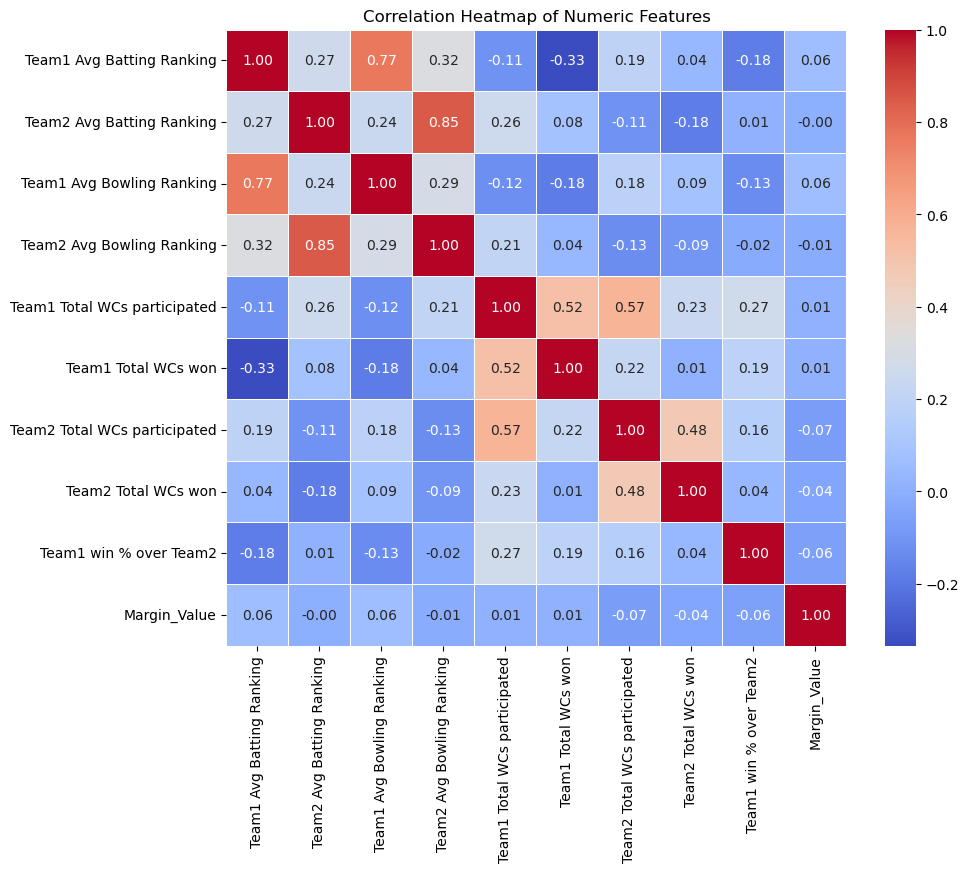

In [34]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features')

plt.show()
